<p align="center">
  <span style="color:Navy; font-size:200%; font-weight:bold; vertical-align:middle;">
    Temas Selectos: Python para Ciencias de la Tierra
  </span>
  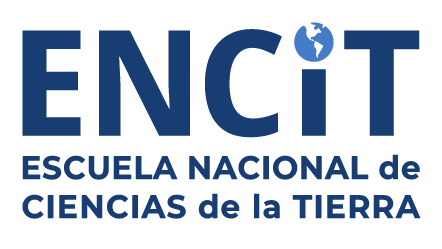
</p>
<p align="center" style="line-height:1.2;">
  <span style="color:RoyalBlue; font-size:160%;">Tema 3: MAnálisis Geoespacial de Datos</span><br/>
  <span style="color:DodgerBlue; font-size:140%;"> Técnicas de análisis raster y vectorial </span><br/>
  <span style="font-size:100%;color:forestgreen"> Escuela Nacional de Ciencias de la Tierra  |  Semestre 2026-I</span>
</p>

---


# **<font color="ForestGreen"> Datos tipo raster </font>**

## **<font color="SeaGreen"> ¿Qué es un ráster? </font>**

> Los datos ráster o “gridded” se almacenan como una cuadrícula de valores que se representan en un mapa como píxeles. Cada valor de píxel representa un área en la superficie de la Tierra.

Un archivo ráster está compuesto por una cuadrícula regular de celdas, todas del mismo tamaño.

Si has visto y utilizado rásteres antes, probablemente haya sido al observar fotografías o imágenes en herramientas como Google Earth. Sin embargo, los archivos ráster con los que trabajarás son diferentes de las fotografías, ya que están georreferenciados. **Cada píxel representa un área de tierra en el suelo, y esa área está definida por la resolución espacial del ráster.**

* Cada celda se llama píxel.
* Cada píxel representa un área en la superficie terrestre.
* La resolución del ráster indica el área que cada píxel representa en el suelo. Por ejemplo, un ráster con una resolución de 1 metro significa que cada píxel representa un área de 1 m × 1 m en el suelo si su CRS está en metros.
* Un conjunto de datos ráster puede tener atributos asociados. Por ejemplo, en un Modelo Digital de Elevación (DEM), cada celda representa un valor de elevación para esa ubicación en la Tierra.

![ras](ras_vs_vec.png)


Algunas de las bibliotecas que más se usan para trabajar con datos tipo ráste son las siguientes:

### Rasterio

- **rasterio**: Permite la lectura, escritura y manipulación de datos ráster en formatos como GeoTIFF. Facilita la extracción de metadatos y la conversión de coordenadas espaciales.  

- **rioarray**: Extiende rasterio para trabajar con datos ráster como arreglos de NumPy o xarray, facilitando análisis matriciales y operaciones en múltiples bandas.  

- **EarthPy**: Proporciona herramientas para manipulación y visualización de datos geoespaciales, incluyendo funciones para procesar imágenes satelitales y generar mapas con Matplotlib.

In [5]:
! pip install earthpy rasterio rioxarray cartopy

In [6]:
import os  # Manejo de archivos y directorios

# Manipulación y visualización de datos
import numpy as np  # Operaciones numéricas y manejo de arreglos
import matplotlib.pyplot as plt  # Creación de gráficos
import seaborn as sns  # Visualización estadística avanzada

# Análisis geoespacial
import geopandas as gpd  # Manejo de datos vectoriales (shapefiles, ...)
import rasterio as rio  # Lectura y escritura de datos ráster
import rioxarray as rxr  # Extensión de rasterio para usar xarray con datos ráster

# Librería EarthPy para procesamiento y visualización geoespacial
import earthpy as et  # Funciones auxiliares para análisis geoespacial
import earthpy.plot as ep  # Herramientas para visualización de datos espaciales

# Cartopy para visualización de mapas
import cartopy.crs as ccrs  # Sistemas de referencia de coordenadas
import cartopy.feature as cfeature  # Elementos cartográficos (fronteras, costas)
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter  # Formateo de ejes geográficos


Recuerda que la caracteristica principal de un RASTER es el contener información en **PIXELES**.

Dado que los pixeles pueden contener mucha información, un raster puede ser MUY PESADO. Para facilitar y mostrarte los elementos básicos, usaremos datos pre-cargados (pero REALES) en la biblioteca de ***EarthPy***.

Los datos de [EarthPy](https://earthpy.readthedocs.io/en/latest/earthpy-data-subsets.html) incluyen multiples ejemplos de datos tanto de tipo Raster como Vectoriales.

Para el día de hoy usaremos datos GeoTIFF de la [inundación de colorado en 2013](https://figshare.com/articles/dataset/Earth_Analytics_Python_Colorado_Flood_Teaching_Subset/6815945). Utilizando principalmente rasters:

- DSM (Digital Surface Model)
- DTM (Digital Terrain Model)
- Hillshade (Sombra de relieve)

Existen tanto antes como despues de la inundación

In [1]:
import zipfile
import os

zip_path = '/home/jovyan/Unidad_3/Colorado_flood/colorado-flood.zip'  # Cambia esto por la ruta real
extract_to = '/home/jovyan/Unidad_3/Colorado_flood/'  # Carpeta donde se extraerán los archivos

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

### Abrir las imagenes
El parametro masked, es simplemente una eliminación previa desde la lectura de aquellos valores nulos de pixel. Donde no exista clara evidencia de valores reales de los datos.

Ahora veamos el contenido de fondo de dicha imagen.

In [19]:
pre_dsm = rxr.open_rasterio("/home/jovyan/Unidad_3/Colorado_flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DSM.tif", masked=True)
pre_dtm = rxr.open_rasterio("/home/jovyan/Unidad_3/Colorado_flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif", masked=True)

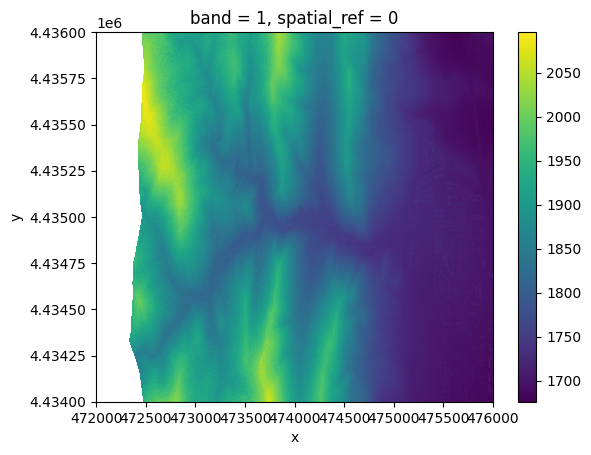

In [20]:
pre_dsm.plot()

In [21]:
pre_dsm

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

Como ves el contenido de la imagen ahora presenta un contenido númerico leido y entendido a partir de los elementos del GeoTIFF, reconociendo a una estructura de datos similar a las que hemos trabajado previamente en Python.

## ELEMENTOS DEL RASTER

Verifiquemos pues los elementos que debes revisar previo a cualquier operación con datos de este tipo:

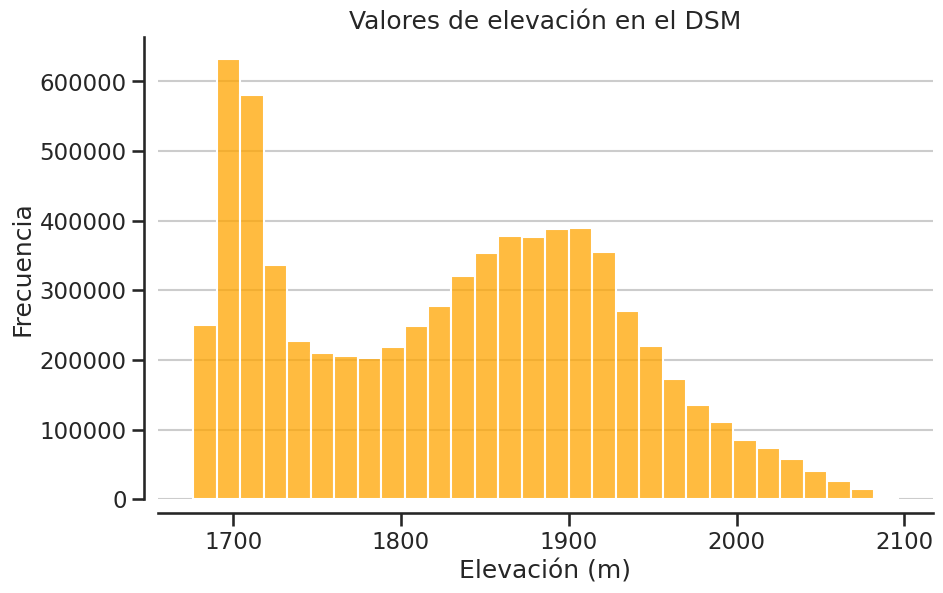

In [22]:
# Histograma

custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes=True)
sns.set_style("ticks")


# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar el histograma con Seaborn
sns.histplot(pre_dsm.values.flatten(),
             bins=30,
             color="orange",
             ax=ax)
sns.despine(offset=10)

# Personalizar etiquetas y título
ax.set(title="Valores de elevación en el DSM",
       xlabel="Elevación (m)",
       ylabel="Frecuencia")
ax.yaxis.grid(True)

# Mostrar la gráfica
plt.show()

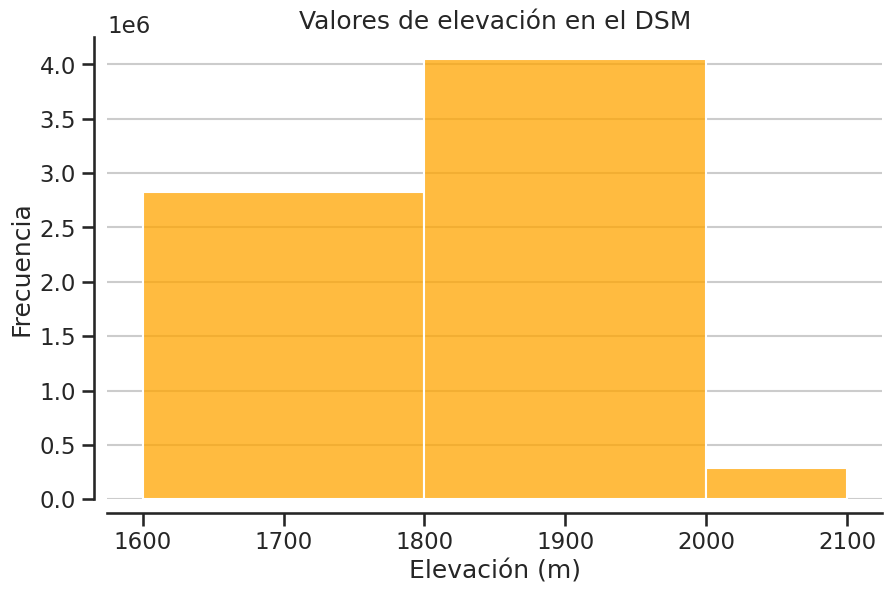

In [23]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 6))

custom_params = {"axes.spines.right": True, "axes.spines.top": True, "axes.spines.left": True}
sns.set_theme(style='whitegrid', context="talk", rc=custom_params, color_codes=True)
sns.set_style("ticks")


# Graficar el histograma con Seaborn
sns.histplot(pre_dsm.values.flatten(),
             bins=[1600, 1800, 2000, 2100],
             color="orange",
             ax=ax)

# Personalizar etiquetas y título
ax.set(title="Valores de elevación en el DSM",
       xlabel="Elevación (m)",
       ylabel="Frecuencia")

sns.despine(offset=10)
ax.yaxis.grid(True)

# Mostrar la gráfica
plt.show()

El codigo anterior es solo mostrar los histogramas y ver el conteo de frecuencia que existe de las elevaciones

### Ahora veamos la **metadata**

In [24]:
print("El sistema de referencia de coordenadas (CRS) de tus datos es:", pre_dsm.rio.crs)
print("El valor de no datos (nodatavalue) de tus datos es:", pre_dsm.rio.nodata)
print("La forma (dimensiones) de tus datos es:", pre_dsm.shape)
print("La resolución espacial de tus datos es:", pre_dsm.rio.resolution())

El sistema de referencia de coordenadas (CRS) de tus datos es: EPSG:32613
El valor de no datos (nodatavalue) de tus datos es: nan
La forma (dimensiones) de tus datos es: (1, 2000, 4000)
La resolución espacial de tus datos es: (1.0, -1.0)


---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 1:  </font>**
<font color="DarkBlue"> 1. Con esto podemos conocer la información previa. Ahora revisa estas caracteristicas **histograma y metadata** pero para el DTM.

---

# HAGAMOS ALGUNAS OPERACIONES:

- Operaciones matematicas con los datos de raster (Canopy Height Model)
- Clasificación dentro del Raster y visualización
- Reproyección del raster

### Modelo de Altura del Copa (CHM)
El Modelo de Altura del Copa (CHM) representa la altura de los árboles. No es un valor de elevación, sino la diferencia entre el suelo y la parte superior de los árboles (o edificios, si no se han eliminado del DSM).

### Calcular la Diferencia Entre Dos Rásteres
Una forma sencilla de calcular un CHM es restando el DEM del DSM:

DSM − DEM = CHM


Esto nos da la diferencia entre la parte superior de la superficie terrestre y el suelo, es decir, la altura de los árboles (y edificios, si no se han limpiado los datos).

### Modelo de Altura del Copa (CHM)
El Modelo de Altura del Copa (CHM) representa la altura de los árboles. No es un valor de elevación, sino la diferencia entre el suelo y la parte superior de los árboles (o edificios, si no se han eliminado del DSM).

### Calcular la Diferencia Entre Dos Rásteres
Una forma sencilla de calcular un CHM es restando el DEM del DSM:

DSM − DEM = CHM


Esto nos da la diferencia entre la parte superior de la superficie terrestre y el suelo, es decir, la altura de los árboles (y edificios, si no se han limpiado los datos).

In [25]:
# ¿Los límites espaciales son los mismos?
print("¿La extensión espacial es la misma?",
      pre_dsm.rio.bounds() == pre_dtm.rio.bounds())

# ¿La resolución es la misma?
print("¿La resolución es la misma?",
      pre_dsm.rio.resolution() == pre_dtm.rio.resolution())

¿La extensión espacial es la misma? True
¿La resolución es la misma? True


In [26]:
# Calcular el Modelo de Altura del Dosel (CHM)
lidar_chm_xr = pre_dsm - pre_dtm

lidar_chm_xr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
array([[[       nan,        nan,        nan, ..., 0.        ,
         0.17004395, 0.960083  ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.09008789, 1.6400146 ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.07995605],
        ...,
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ],
        [       nan,        nan,        nan, ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0

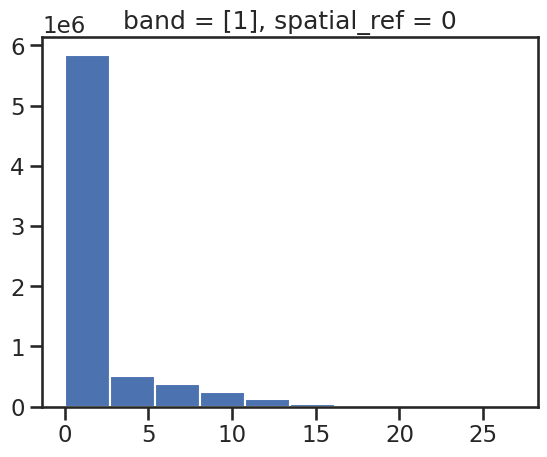

In [27]:
lidar_chm_xr.plot.hist()
plt.show()

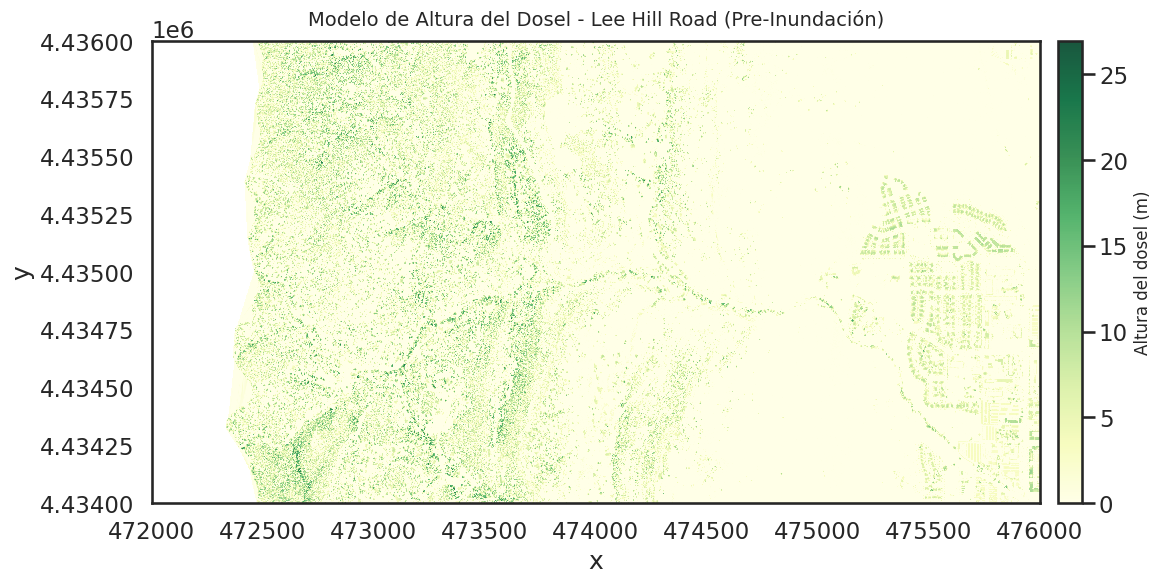

In [28]:
# Configurar estilos de visualización
sns.set_style("white")
plt.rcParams.update({"font.size": 12})

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(12, 6))

# Graficar el CHM con una mejor escala de colores y barra de color ajustada
im = lidar_chm_xr.plot(ax=ax, cmap="YlGn", alpha=0.9, add_colorbar=False)

# Agregar una barra de color personalizada
cbar = plt.colorbar(im, ax=ax, fraction=0.025, pad=0.02)
cbar.set_label("Altura del dosel (m)", fontsize=12)

# Mejorar la presentación del mapa
ax.set_title("Modelo de Altura del Dosel - Lee Hill Road (Pre-Inundación)", fontsize=14, pad=12)

plt.show()

## Clasificación dentro del Raster y visualización

En ese ráster, cada píxel se asigna a un nuevo valor según un determinado enfoque. Este enfoque puede variar dependiendo de la pregunta científica que se quiera responder.

### **Explorar Histogramas de Ráster**  
Explora más a fondo tu histograma ajustando los límites del eje **X** y **Y** con los parámetros `xlim` y `ylim`.  

Estos parámetros permiten hacer un **zoom visual** en los datos del gráfico, pero **no modifican** los valores originales del dataset.

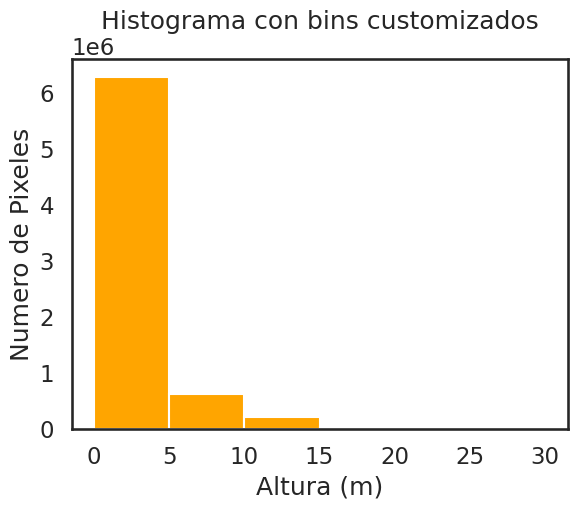

In [29]:
# Histogram with custom breaks
f, ax = plt.subplots()
lidar_chm_xr.plot.hist(color="orange",
                        bins=[0, 5, 10, 15, 20, 30])
ax.set(title="Histograma con bins customizados",
       xlabel="Altura (m)",
       ylabel="Numero de Pixeles")

plt.show()

Es posible que desees ajustar la distribución de los intervalos (**bins**) del histograma. En el gráfico actual, parece que hay muchos valores cercanos a **0**.  

En el caso de este instrumento LiDAR, se sabe que los valores entre **0 y 2 metros** no son confiables (según la documentación del sensor NEON y el procesamiento de estos datos).  

### **Clasificación propuesta de altura de árboles:**  
✅ **0 - 2 m** → **Sin árboles** (datos no confiables)  
✅ **2 - 7 m** → **Árboles bajos**  
✅ **7 - 12 m** → **Árboles medianos**  
✅ **> 12 m** → **Árboles altos**  

A continuación, puedes experimentar con estos intervalos para visualizar mejor la distribución de alturas en tu dataset. 🌳

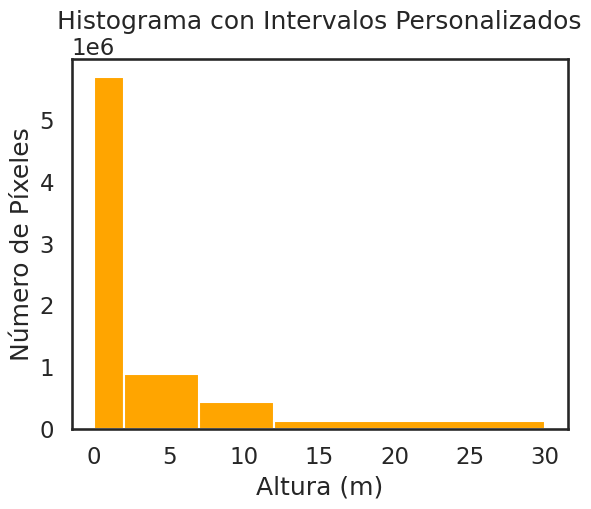

In [30]:
# Histograma con intervalos personalizados
f, ax = plt.subplots()

lidar_chm_xr.plot.hist(
    color='orange',
    bins=[0, 2, 7, 12, 30])
ax.set(title="Histograma con Intervalos Personalizados",
       xlabel="Altura (m)",
       ylabel="Número de Píxeles")

plt.show()

### **Mapear los valores del ráster a nuevos valores (Reclasificación del Ráster)**  
Para reclasificar tu ráster, primero necesitas crear una **matriz de reclasificación**.  

Esta matriz **mapea** un rango de valores a un nuevo valor definido. Utilizarás esta matriz para crear un modelo de altura del dosel clasificado, donde designarás **árboles bajos**, **medios** y **altos**.  

Los nuevos valores definidos serán los siguientes:

- **Sin árboles**: (0m - 2m de altura) = **NA**  
- **Árboles bajos**: (2m - 7m de altura) = **1**  
- **Árboles medianos**: (7m - 12m de altura) = **2**  
- **Árboles altos**: (> 12m de altura) = **3**  

### **Observaciones**:  
1. En la lista anterior, configuraste las celdas con un valor entre **0 y 2 metros** como **NA** o valor **nodatavalue**. Esto significa que estás asumiendo que no hay árboles en esas ubicaciones.  
2. En la matriz de reclasificación, se utiliza **Inf** para representar el valor más grande o el valor máximo encontrado en el ráster. Entonces, la asignación sería la siguiente:

| **Rango de altura (m)** | **Valor reclasificado** |
|-------------------------|-------------------------|
| 0 - 2                   | NA (Sin árboles)        |
| 2 - 7                   | 1 (Árboles bajos)       |
| 7 - 12                  | 2 (Árboles medianos)    |
| > 12 o 12 - Inf          | 3 (Árboles altos)       |


In [31]:
lidar_chm_xr.rio.nodata

In [32]:
data_min_value = np.nanmin(lidar_chm_xr)
data_max_value = np.nanmax(lidar_chm_xr)
print(data_min_value, data_max_value)

0.0 26.930054


In [33]:
class_bins = [-np.inf, 2, 7, 12, np.inf]
class_bins

[-inf, 2, 7, 12, inf]

In [34]:
# Clasificación de datos usando xarray
import xarray as xr
pre_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     lidar_chm_xr,
                                     class_bins)

In [35]:
pre_lidar_chm_class

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 64MB
array([[[5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1],
        ...,
        [5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1],
        [5, 5, 5, ..., 1, 1, 1]]])
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0

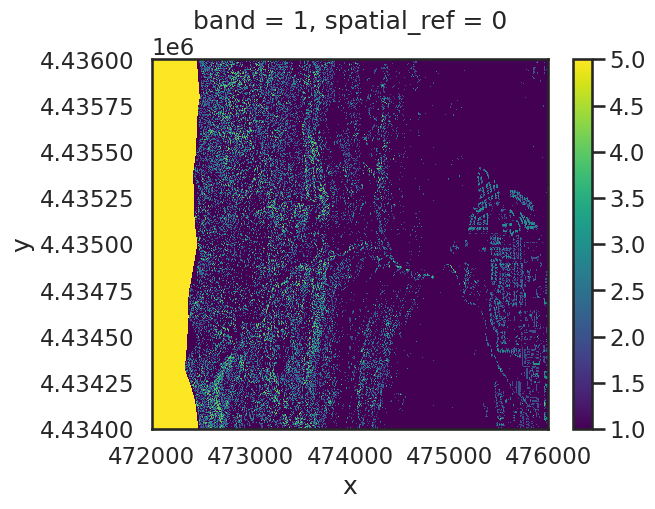

In [36]:
im = pre_lidar_chm_class.plot()
ax.set_axis_off()

In [37]:
# Enmasacarando valores igual 5 que representan valores nulos
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class != 5)
pre_lidar_chm_class_ma

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 64MB
array([[[nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]])
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
    spatial_ref  int64 8B 0

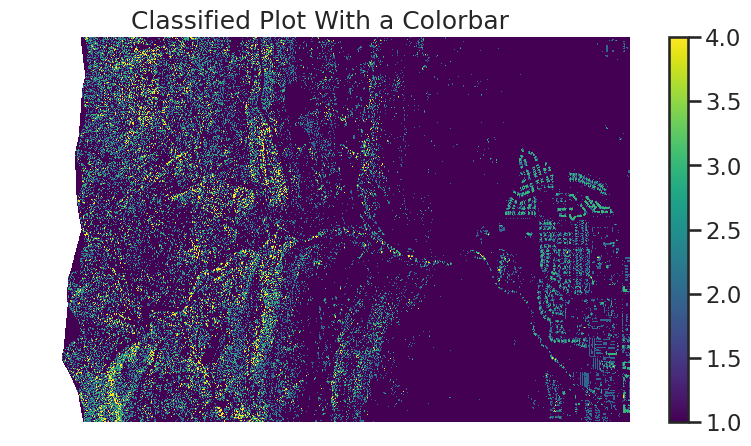

In [38]:
# Graficando valores enmascarados
f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_ma.plot()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()

plt.show()

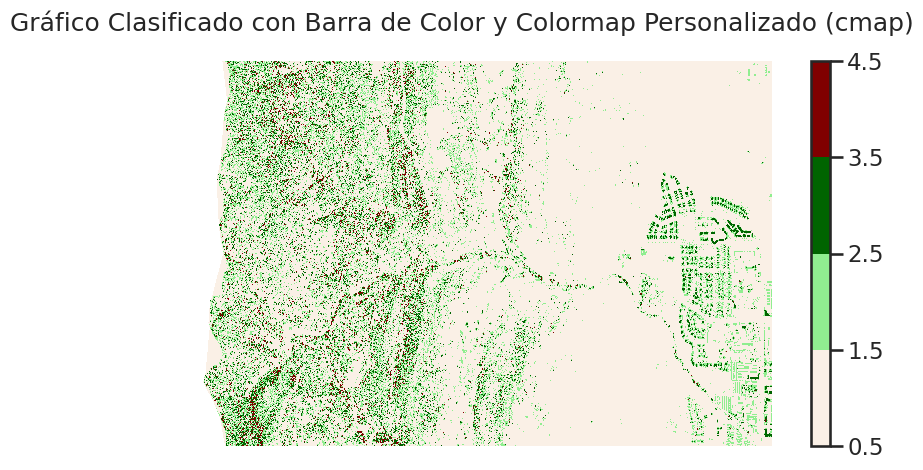

In [39]:
from matplotlib.colors import ListedColormap, BoundaryNorm


# Graficar los datos usando colores más agradables
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins,
                    len(colors))

# Graficar el ráster recién clasificado y enmascarado
f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_chm_class_ma.plot(cmap=cmap,
                                   norm=norm)
ax.set(title="Gráfico Clasificado con Barra de Color y Colormap Personalizado (cmap)")
ax.set_axis_off()
plt.show()


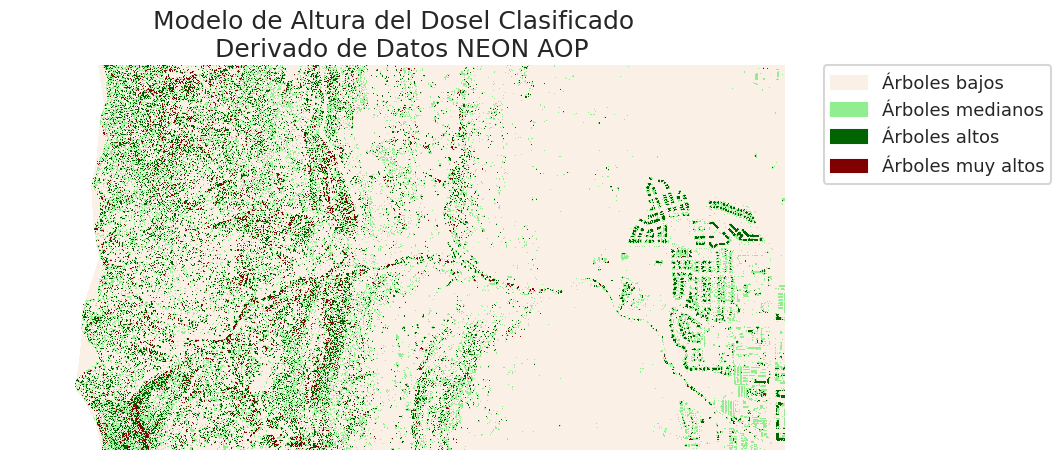

In [40]:
# Crear una lista de etiquetas para la leyenda
etiquetas_altura = ["Árboles bajos",
                    "Árboles medianos",
                    "Árboles altos",
                    "Árboles muy altos"]

# Crear un colormap a partir de una lista de colores
colores = ['linen', 'lightgreen', 'darkgreen', 'maroon']
cmap = ListedColormap(colores)

# Definir los límites de las clases para la reclasificación
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins, len(colores))

# Graficar el ráster recién clasificado y enmascarado
f, ax = plt.subplots(figsize=(10, 5))

# Imágenes del ráster
im = pre_lidar_chm_class_ma.squeeze().plot.imshow(cmap=cmap, norm=norm, add_colorbar=False)

# Asegurarse de que la imagen esté correctamente renderizada
ax.set(title="Modelo de Altura del Dosel Clasificado \n Derivado de Datos NEON AOP")
ax.set_axis_off()

# Agregar la leyenda utilizando EarthPy
# Ahora pasamos el objeto de imagen correctamente a draw_legend
ep.draw_legend(im, titles=etiquetas_altura)

# Mostrar la gráfica
plt.show()


---
<a name='ej-1'></a>
### **<font color="DodgerBlue"> Ejercicio 2: Replica el análisis que hicimos ahora con los datos post-inundación  </font>**
<font color="DarkBlue"> 1. Carga y grafica los archivos DSM y DTM.

<font color="DarkBlue"> 2. Obtenén los histogramas de DSM y DTM post inundación

<font color="DarkBlue"> 3. Obtén el Modelo de Altura del Copa (CHM) post inundación.

¿Hubo alguna diferencia?

